# Práctica 2 - Visualización de Datos
### Equipo: 7
#### Grupo: 002 
#### Integrantes: 
#### 1745134 Ramírez Arellano Nathanael
#### 1795417 Mendoza Sanchez Evelin Yamile
#### 1798181 Tello Esparza Jesus Omar

## 1. [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)

### Preparación de los datos

In [106]:
import pandas as pd
import numpy as np
import json

#llamamos el archivo de excel
heartbase = pd.read_csv("heart_failure_clinical_records_dataset.csv")

### Cambiar el nombre de las columnas
- En nuestro caso, modificamos los nombres de las columnas al idioma español

In [107]:
heartbase = heartbase.rename(columns = {'age':'Edad','anaemia':'Anemia','creatinine_phosphokinase':'Creatina_Fosfoquinasa','diabetes':'Diabetes','ejection_fraction':'Fraccion_de_Eyeccion',
                           'high_blood_pressure':'Hipertension','platelets':'Plaquetas','serum_creatinine':'Suero_de_Creatinina','serum_sodium':'Suero_de_Sodio','sex':'Sexo',
                           'smoking':'Fumador','time':'Tiempo','DEATH_EVENT':'Muerte'}) #los nombres de las columnas se modificaron al idioma español

Modificar el nombre de las columnas es el único cambio necesario para nuestro análisis, ya que toda la información es importante.

In [108]:
heartbase

,Edad,Anemia,Creatina_Fosfoquinasa,Diabetes,Fraccion_de_Eyeccion,Hipertension,Plaquetas,Suero_de_Creatinina,Suero_de_Sodio,Sexo,Fumador,Tiempo,Muerte
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### Información estadística básica
A continuación ingresaremos algunas de las opciones que maneja Pandas para la estadística básica.

- La suma de todos los pacientes que murieron.

In [109]:
heartbase['Muerte'].sum()

96

- La edad promedio de los pacientes.

In [110]:
heartbase['Edad'].mean()

60.83389297658862

- Resumen estadístico sobre los niveles de Sodio en la sangre de los pacientes.

In [111]:
heartbase['Suero_de_Sodio'].describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: Suero_de_Sodio, dtype: float64

- Número de pacientes

In [112]:
heartbase['Edad'].count()

299

- Tiempo mínimo que pasó siendo observado un paciente.

In [113]:
heartbase['Tiempo'].min()

4

- Tiempo máximo que pasó siendo observado un paciente.

In [114]:
heartbase['Tiempo'].max()

285

- Mediana de la edad de los pacientes.

In [115]:
heartbase['Edad'].median()

60.0

- Varianza de las plaquetas.

In [116]:
heartbase['Plaquetas'].var()

9565668749.44888

- Desviación estándar de las plaquetas.

In [117]:
heartbase['Plaquetas'].std()

97804.23686859828

- Correlación de la base de datos.

In [118]:
heartbase.corr()

,Edad,Anemia,Creatina_Fosfoquinasa,Diabetes,Fraccion_de_Eyeccion,Hipertension,Plaquetas,Suero_de_Creatinina,Suero_de_Sodio,Sexo,Fumador,Tiempo,Muerte
Edad,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
Anemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
Creatina_Fosfoquinasa,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
Diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
Fraccion_de_Eyeccion,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
Hipertension,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
Plaquetas,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
Suero_de_Creatinina,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
Suero_de_Sodio,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
Sexo,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


- Covarianza de los datos.

In [119]:
heartbase.cov()

,Edad,Anemia,Creatina_Fosfoquinasa,Diabetes,Fraccion_de_Eyeccion,Hipertension,Plaquetas,Suero_de_Creatinina,Suero_de_Sodio,Sexo,Fumador,Tiempo,Muerte
Edad,141.486483,0.519335,-9.415915e+02,-0.593633,8.460237,0.530565,-6.090712e+04,1.958845,-2.412544,0.372120,0.103847,-206.861351,1.411454
Anemia,0.519335,0.246122,-9.181641e+01,-0.003120,0.185282,0.009057,-2.124536e+03,0.026777,0.091681,-0.022480,-0.024893,-5.445142,0.015376
Creatina_Fosfoquinasa,-941.591531,-91.816413,9.414586e+05,-4.620581,-506.174452,-32.748805,2.321533e+06,-16.470382,254.956443,37.017261,1.098696,-703.803618,28.464468
Diabetes,-0.593633,-0.003120,-4.620581e+00,0.244102,-0.028361,-0.003008,4.454928e+03,-0.024010,-0.195226,-0.037261,-0.034006,1.293259,-0.000449
Fraccion_de_Eyeccion,8.460237,0.185282,-5.061745e+02,-0.028361,140.063455,0.138325,8.354524e+04,-0.138379,9.185787,-0.839667,-0.372573,38.330464,-1.486667
Hipertension,0.530565,0.009057,-3.274880e+01,-0.003008,0.138325,0.228614,2.336480e+03,-0.002441,0.078292,-0.023916,-0.012458,-7.289904,0.017744
Plaquetas,-60907.118586,-2124.535856,2.321533e+06,4454.928228,83545.241001,2336.480427,9.565669e+09,-4168.399498,26810.436905,-5851.104689,1291.447854,79811.066099,-2247.619159
Suero_de_Creatinina,1.958845,0.026777,-1.647038e+01,-0.024010,-0.138379,-0.002441,-4.168399e+03,1.070211,-0.863173,0.003448,-0.013263,-11.988935,0.142374
Suero_de_Sodio,-2.412544,0.091681,2.549564e+02,-0.195226,9.185787,0.078292,2.681044e+04,-0.863173,19.469956,-0.058158,0.009932,30.014152,-0.402819
Sexo,0.372120,-0.022480,3.701726e+01,-0.037261,-0.839667,-0.023916,-5.851105e+03,0.003448,-0.058158,0.228614,0.099706,-0.579224,-0.000965


### Gráficos
Importamos librerias necesarias.

In [120]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

### Gráfica de barras:

- Las 10 edades con mayores números de pacientes. Podemos observar que más de 30 paceintes tienen 60 años.

<AxesSubplot:>

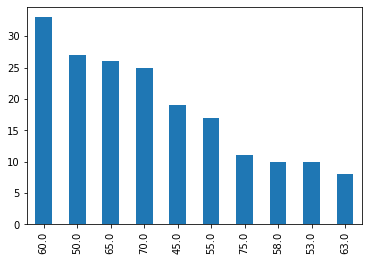

In [121]:
heartbase['Edad'].value_counts().head(10).plot.bar()

### Gráfica de lineas:

- Observamos la cantidad de personas que expulsan cierto porcentaje de sangre tras cada contracción.

<AxesSubplot:>

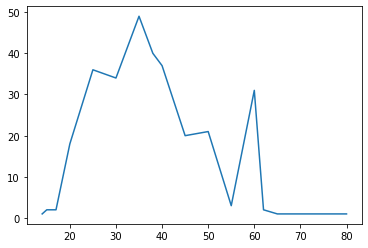

In [122]:
heartbase['Fraccion_de_Eyeccion'].value_counts().sort_index().plot.line()

- Área

<AxesSubplot:>

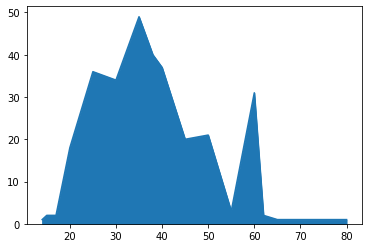

In [123]:
heartbase['Fraccion_de_Eyeccion'].value_counts().sort_index().plot.area()

### Histogramas:

- Observamos los intervalos en los cuales mueren más pacientes.

<AxesSubplot:ylabel='Frequency'>

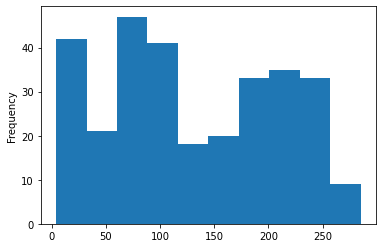

In [124]:
heartbase['Tiempo'].plot.hist()

### Scatter plot:

- En esta gráfica de dispersión, podemos observar que la mayoría de los niveles de Creatina fosfoquinasa se encuentra por debajo de los 3000.

<AxesSubplot:xlabel='Edad', ylabel='Creatina_Fosfoquinasa'>

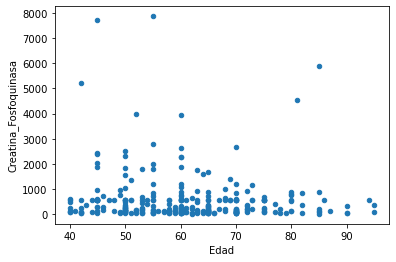

In [125]:
heartbase.plot.scatter(x='Edad', y='Creatina_Fosfoquinasa')

- Hexplot

<AxesSubplot:xlabel='Edad', ylabel='Creatina_Fosfoquinasa'>

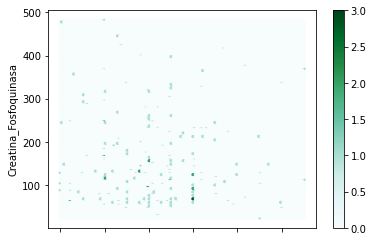

In [126]:
heartbase[heartbase['Creatina_Fosfoquinasa']<500].plot.hexbin(x='Edad', y='Creatina_Fosfoquinasa')

### Stacked plots:

<AxesSubplot:>

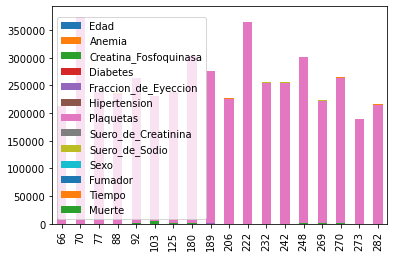

In [127]:
heartbase[heartbase['Edad']<45].plot.bar(stacked=True)

<AxesSubplot:>

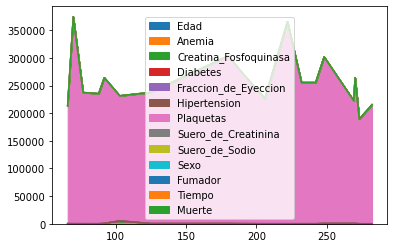

In [128]:
heartbase[heartbase['Edad']<45].plot.area(stacked=True)

<AxesSubplot:>

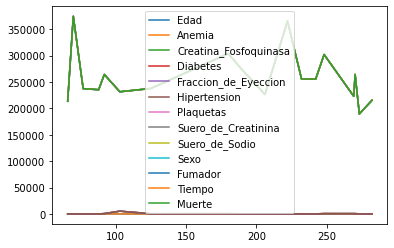

In [129]:
heartbase[heartbase['Edad']<45].plot.line(stacked=True)

### Box plots:

- Podemos ver la distribución de las edades para hombres y mujeres.

<AxesSubplot:xlabel='Sexo', ylabel='Edad'>

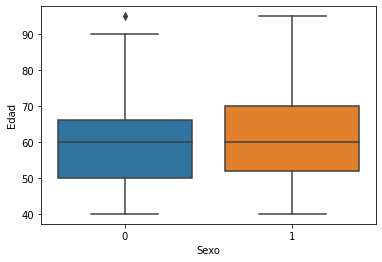

In [130]:
sns.boxplot(x='Sexo',y='Edad',data=heartbase)

- Violin

<AxesSubplot:xlabel='Sexo', ylabel='Edad'>

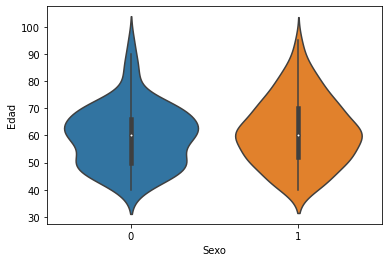

In [131]:
sns.violinplot(x='Sexo',y='Edad',data=heartbase)

## 2. [Restaurant Business Rankings 2020](https://www.kaggle.com/michau96/restaurant-business-rankings-2020?select=Future50.csv)

In [132]:
import pandas as pd
import numpy as np
import json

#llamamos el archivo de excel
comida = pd.read_csv("Future50.csv")

### Cambiar el nombre de las columnas
- En nuestro caso, modificamos los nombres de las columnas al idioma español

In [133]:
comida = comida.rename(columns = {'Rank':'Rango','Restaurant':'Restaurante','Location':'Localizacion','Sales':'Ventas','YOY_Sales':'Incremento_Anual_de_Ventas',
                           'Units':'Unidades','YOY_Units':'Incremento_Anual_de_Unidades','Unit_Volume':'Volumen_de_Unidades','Franchising':'Cadena'}) #los nombres de las columnas se modificaron al idioma español

Modificar el nombre de las columnas es el único cambio necesario para nuestro análisis, ya que toda la información es importante.

In [134]:
comida

,Rango,Restaurante,Localizacion,Ventas,Incremento_Anual_de_Ventas,Unidades,Incremento_Anual_de_Unidades,Volumen_de_Unidades,Cadena
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No


### Información estadística básica
A continuación ingresaremos algunas de las opciones que maneja Pandas para la estadística básica.

- La suma de todas las ventas.

In [135]:
comida['Ventas'].sum()

1689

- El promedio de unidades.

In [136]:
comida['Unidades'].mean()

34.7

- Resumen estadístico sobre el incremento anual de ventas.

In [137]:
comida['Incremento_Anual_de_Ventas'].describe()

count        50
unique       49
top       19.5%
freq          2
Name: Incremento_Anual_de_Ventas, dtype: object

- Número de restaurantes.

In [138]:
comida['Restaurante'].count()

50

- Cantidad mínima del volumen de unidades.

In [139]:
comida['Volumen_de_Unidades'].min()

465

- Cantidad máxima del volumen de unidades.

In [140]:
comida['Volumen_de_Unidades'].max()

4300

- Mediana de las ventas.

In [141]:
comida['Ventas'].median()

34.5

- Varianza de las unidades.

In [142]:
comida['Unidades'].var()

601.6020408163266

- Desviación estándar de las unidades.

In [143]:
comida['Unidades'].std()

24.527577149329826

- Correlación de la base de datos.

In [144]:
comida.corr()

,Rango,Ventas,Unidades,Volumen_de_Unidades
Rango,1.000000,0.187535,-0.358137,0.359759
Ventas,0.187535,1.000000,0.504153,-0.117048
Unidades,-0.358137,0.504153,1.000000,-0.712994
Volumen_de_Unidades,0.359759,-0.117048,-0.712994,1.000000


- Covarianza de los datos.

In [145]:
comida.cov()

,Rango,Ventas,Unidades,Volumen_de_Unidades
Rango,212.500000,26.234694,-128.051020,5216.428571
Ventas,26.234694,92.093469,118.667347,-1117.273469
Unidades,-128.051020,118.667347,601.602041,-17394.918367
Volumen_de_Unidades,5216.428571,-1117.273469,-17394.918367,989381.877551


### Gráficos
Importamos librerias necesarias.

In [146]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline

### Gráfica de barras:

- Las 10 mayores cantidades de restaurantes con más volumen de unidades.

<AxesSubplot:>

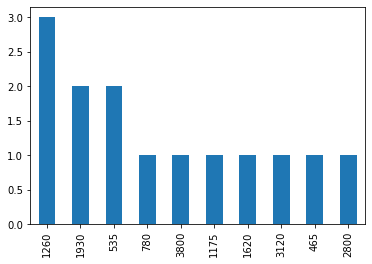

In [147]:
comida['Volumen_de_Unidades'].value_counts().head(10).plot.bar()

### Gráfica de lineas:

- Observamos frecuencias de unidades que poseen unidades.

<AxesSubplot:>

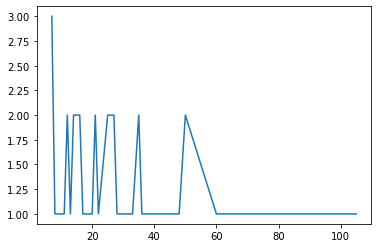

In [148]:
comida['Unidades'].value_counts().sort_index().plot.line()

- Área

<AxesSubplot:>

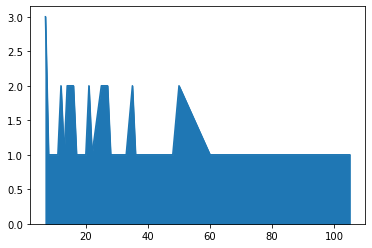

In [149]:
comida['Unidades'].value_counts().sort_index().plot.area()

### Histogramas:

- Podemos observar que dado es un ranking, la distribución de las posiciones es equitativa a lo largo del histograma.

<AxesSubplot:ylabel='Frequency'>

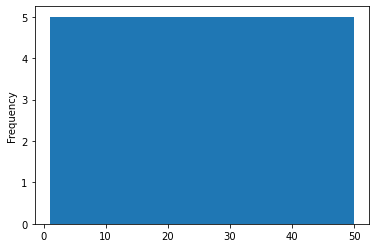

In [150]:
comida['Rango'].plot.hist()

### Scatter plot:

- En esta gráfica de dispersión, podemos observar que conforme tenemos más unidades, las ventas pueden ir subiendo.

<AxesSubplot:xlabel='Unidades', ylabel='Ventas'>

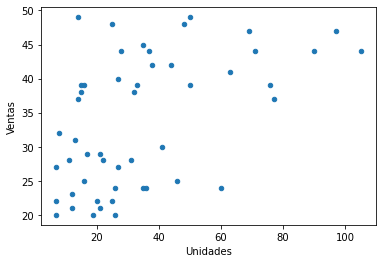

In [151]:
comida.plot.scatter(x='Unidades', y='Ventas')

- Hexplot

<AxesSubplot:xlabel='Unidades', ylabel='Ventas'>

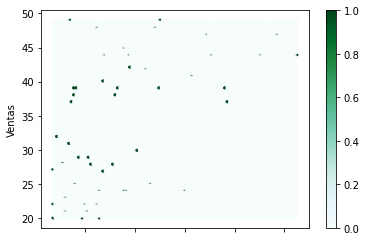

In [152]:
comida.plot.hexbin(x='Unidades', y='Ventas')

### Stacked plots:

<AxesSubplot:>

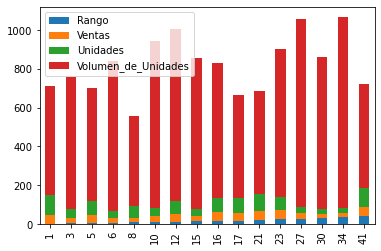

In [153]:
comida[comida['Volumen_de_Unidades']<1000].plot.bar(stacked=True)

<AxesSubplot:>

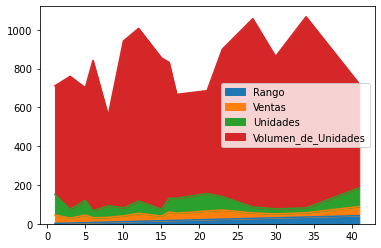

In [154]:
comida[comida['Volumen_de_Unidades']<1000].plot.area(stacked=True)

<AxesSubplot:>

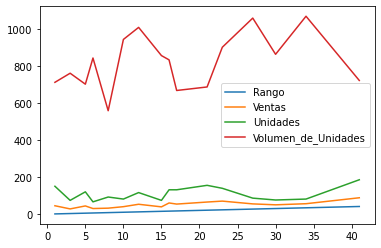

In [155]:
comida[comida['Volumen_de_Unidades']<1000].plot.line(stacked=True)

### Box plots:

- Podemos ver la distribución del ranking si el restaurante es una cadena o no.

<AxesSubplot:xlabel='Cadena', ylabel='Rango'>

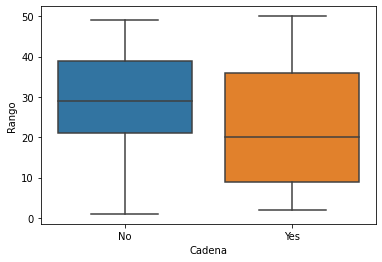

In [156]:
sns.boxplot(x='Cadena',y='Rango',data=comida)

- Violin

<AxesSubplot:xlabel='Cadena', ylabel='Rango'>

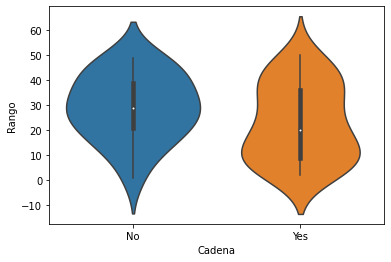

In [157]:
sns.violinplot(x='Cadena',y='Rango',data=comida)